<h2>3. Neighborhood around University<h2>

## 1.Import labraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [2]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [3]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


## 2. Create the dataframe

In [6]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
#get the date from json file
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


check all the boroughs in New York City

In [8]:
neighborhoods['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

## 3. Get the neighborhoods in Manhatten

since I want to live in manhatten, let's check the neighborhoods in manhatten

In [9]:
mnd = neighborhoods[neighborhoods['Borough'] == 'Manhattan']
mnd.head()

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688


In [10]:
mnd.reset_index(drop = True, inplace = True)
mnd = mnd.dropna()
mnd.shape

(40, 4)

## 4 . Get the distance of neighborhoods in Manhatten to New York University

I want to see the distance of each neighborhoods to New York University, first we define a function to caculate the distance

In [11]:
# Haversine formula example in Python
# Author: Wayne Dyck

import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [12]:
mnd['Distance to NYU(km)'] = mnd.apply(lambda r:distance((r['Latitude'],r['Longitude']),(40.72925325,-74.0060152)),axis=1)
mnd

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
0,Manhattan,Marble Hill,40.876551,-73.910660,18.239554
1,Manhattan,Chinatown,40.715618,-73.994279,1.810183
2,Manhattan,Washington Heights,40.851903,-73.936900,14.827319
3,Manhattan,Inwood,40.867684,-73.921210,16.967513
4,Manhattan,Hamilton Heights,40.823604,-73.949688,11.513660
5,Manhattan,Manhattanville,40.816934,-73.957385,10.574777
6,Manhattan,Central Harlem,40.815976,-73.943211,10.998178
7,Manhattan,East Harlem,40.792249,-73.944182,8.728647
8,Manhattan,Upper East Side,40.775639,-73.960508,6.426290
9,Manhattan,Yorkville,40.775930,-73.947118,7.179927


In [13]:
mnd.sort_values('Distance to NYU(km)',ascending=True, inplace=True)
mnd.head()

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
18,Manhattan,Greenwich Village,40.726933,-73.999914,0.575227
24,Manhattan,West Village,40.734434,-74.006180,0.576233
23,Manhattan,Soho,40.722184,-74.000657,0.906546
21,Manhattan,Tribeca,40.721522,-74.010683,0.945405
22,Manhattan,Little Italy,40.719324,-73.997305,1.325842


In [14]:
mnd.reset_index(drop=True, inplace=True)
mnd.head()

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
0,Manhattan,Greenwich Village,40.726933,-73.999914,0.575227
1,Manhattan,West Village,40.734434,-74.006180,0.576233
2,Manhattan,Soho,40.722184,-74.000657,0.906546
3,Manhattan,Tribeca,40.721522,-74.010683,0.945405
4,Manhattan,Little Italy,40.719324,-73.997305,1.325842


## 5 . visualization neighborhoods in manhatten that close to New York University

In [15]:
man_nei=mnd.copy()
man_nei

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
0,Manhattan,Greenwich Village,40.726933,-73.999914,0.575227
1,Manhattan,West Village,40.734434,-74.006180,0.576233
2,Manhattan,Soho,40.722184,-74.000657,0.906546
3,Manhattan,Tribeca,40.721522,-74.010683,0.945405
4,Manhattan,Little Italy,40.719324,-73.997305,1.325842
5,Manhattan,Civic Center,40.715229,-74.005415,1.560254
6,Manhattan,Noho,40.723259,-73.988434,1.624577
7,Manhattan,Chelsea,40.744035,-74.003116,1.661671
8,Manhattan,Flatiron,40.739673,-73.990947,1.718804
9,Manhattan,Chinatown,40.715618,-73.994279,1.810183


I don't want to live 10km away from University, so I only konsider the neighbrhoods within 10km from NYU

In [16]:
man_nei_near=man_nei[man_nei['Distance to NYU(km)']<=10].reset_index(drop=True)
man_nei_near

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
0,Manhattan,Greenwich Village,40.726933,-73.999914,0.575227
1,Manhattan,West Village,40.734434,-74.006180,0.576233
2,Manhattan,Soho,40.722184,-74.000657,0.906546
3,Manhattan,Tribeca,40.721522,-74.010683,0.945405
4,Manhattan,Little Italy,40.719324,-73.997305,1.325842
5,Manhattan,Civic Center,40.715229,-74.005415,1.560254
6,Manhattan,Noho,40.723259,-73.988434,1.624577
7,Manhattan,Chelsea,40.744035,-74.003116,1.661671
8,Manhattan,Flatiron,40.739673,-73.990947,1.718804
9,Manhattan,Chinatown,40.715618,-73.994279,1.810183


In [17]:
man_nei_far=man_nei[man_nei['Distance to NYU(km)']>=10].reset_index(drop=True)
man_nei_far

,Borough,Neighborhood,Latitude,Longitude,Distance to NYU(km)
0,Manhattan,Manhattanville,40.816934,-73.957385,10.574777
1,Manhattan,Central Harlem,40.815976,-73.943211,10.998178
2,Manhattan,Hamilton Heights,40.823604,-73.949688,11.513660
3,Manhattan,Washington Heights,40.851903,-73.936900,14.827319
4,Manhattan,Inwood,40.867684,-73.921210,16.967513
5,Manhattan,Marble Hill,40.876551,-73.910660,18.239554


In [18]:
# create map of Manhattan using latitude and longitude values
latitude_man = 40.7896239
longitude_man= -73.9598939

map_manhattan = folium.Map(location=[latitude_man, longitude_man], zoom_start=12)

# add markers that near the University
for lat, lng, label in zip(man_nei_near['Latitude'], man_nei_near['Longitude'], man_nei_near['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan) 

# add markers that far from the University
for lat, lng, label in zip(man_nei_far['Latitude'], man_nei_far['Longitude'], man_nei_far['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan) 
    
# add a red circle marker to represent the NewYork University
latitude_NU  = 40.72925325
longitude_NU = -74.0060152

folium.features.CircleMarker(
    [40.72925325,-74.0060152],
    radius=10,
    color='red',
    popup='New York University',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_manhattan)



map_manhattan

## 6. Check the structure from results

#### Using Foursquare to get neighborhoods venue

In [19]:
CLIENT_ID = 'MSHYPL4XVB4AEQRAORJMWA04YZWV0TWGEVRTXREGZQXGS22H' # your Foursquare ID
CLIENT_SECRET = 'EDPCOAMJOYJ1WEVXPTCWPDTWSNR20SWJYZJXS15ARZSYQ1QB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MSHYPL4XVB4AEQRAORJMWA04YZWV0TWGEVRTXREGZQXGS22H
CLIENT_SECRET:EDPCOAMJOYJ1WEVXPTCWPDTWSNR20SWJYZJXS15ARZSYQ1QB


In [20]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [21]:
#the structure of the returned request
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [22]:
category_list = category_results['response']['categories']
len(category_list)

10

In [23]:
#to get the list and ids of the categories
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


## 7. Show the Food venues in these neighborhoods with the range 1km from the coordinate.

Food is important to me, so I care the venues for Food most.

In [24]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [25]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

In [26]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

I want to see the Restaurants aroung the coordinate of each neighborhoods near the NYU in radius 1km

In [27]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

Let's serialize the information retrieved from GET requests and get the food venues. This step will counter any redundant requests to the Foursquare API.

In [28]:
food_venues = getNearbyFood(names=man_nei_near['Neighborhood'],latitudes=man_nei_near['Latitude'],longitudes=man_nei_near['Longitude'])                                    

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 1 venues with incompelete information.


In [29]:
#the size of the dataframe
print(food_venues.shape)
food_venues.head()

(1650, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Greenwich Village,40.726933,-73.999914,Morgenstern’s Finest Ice Cream,40.727057,-73.999864,Ice Cream Shop
1,Greenwich Village,40.726933,-73.999914,Bagel Bob's,40.732518,-73.994039,Bagel Shop
2,Greenwich Village,40.726933,-73.999914,Le Fournil,40.727961,-73.988453,Bakery
3,Greenwich Village,40.726933,-73.999914,Yi Fang Taiwan Fruit Tea,40.728790,-73.988011,Bubble Tea Shop
4,Greenwich Village,40.726933,-73.999914,Nom!,40.733224,-73.993529,Deli / Bodega


check if the data is right.

In [31]:
print(food_venues['Neighborhood'].unique() == man_nei_near['Neighborhood'].unique())

False


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


## 8. Analysing neighborhoods with Food

Number of unique categories 

In [32]:
print('There are {} uniques categories.'.format(len(food_venues['Venue Category'].unique())))
food_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 94 uniques categories.


Venue Category
Coffee Shop                        270
Bakery                              91
Deli / Bodega                       73
Pizza Place                         73
Bagel Shop                          70
Fast Food Restaurant                68
Donut Shop                          61
American Restaurant                 50
Sandwich Place                      48
Café                                46
Burger Joint                        44
Mexican Restaurant                  44
Bubble Tea Shop                     39
Italian Restaurant                  39
Chinese Restaurant                  37
Ice Cream Shop                      30
Salad Place                         28
Diner                               28
Food Court                          28
Fried Chicken Joint                 28
Sushi Restaurant                    24
Taco Place                          24
Bar                                 18
Japanese Restaurant                 18
Juice Bar                           18
Grocery St

check how many food venues in each neighborhood

In [33]:
food_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,50,50,50,50,50,50
Chelsea,50,50,50,50,50,50
Chinatown,50,50,50,50,50,50
Civic Center,50,50,50,50,50,50
Clinton,50,50,50,50,50,50
East Harlem,50,50,50,50,50,50
East Village,50,50,50,50,50,50
Financial District,50,50,50,50,50,50
Flatiron,50,50,50,50,50,50


create a dataframe including all the categories for each neighborhood

In [34]:
# one hot encoding
food_onehot = pd.get_dummies(food_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
food_onehot['Neighborhood'] = food_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [food_onehot.columns[-1]] + list(food_onehot.columns[:-1])
food_onehot = food_onehot[fixed_columns]

food_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Belgian Restaurant,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Halal Restaurant,Health Food Store,Himalayan Restaurant,Hobby Shop,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pet Café,Pie Shop,Pizza Place,Poke Place,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Snack Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Greenwich Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Greenwich Village,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Greenwich Village,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Greenwich Village,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Greenwich Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
food_onehot.shape

(1650, 95)

In [36]:
food_grouped= food_onehot.groupby('Neighborhood').mean().reset_index()
food_grouped

,Neighborhood,African Restaurant,American Restaurant,Arepa Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Garden,Belgian Restaurant,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Empanada Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Halal Restaurant,Health Food Store,Himalayan Restaurant,Hobby Shop,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pet Café,Pie Shop,Pizza Place,Poke Place,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Snack Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Battery Park City,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.04,0.06,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.02,0.06,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00
1,Chelsea,0.00,0.04,0.00,0.00,0.00,0.04,0.06,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.06,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.00,0.02,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.02,0.00,0.04,0.00
2,Chinatown,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.10,0.00,0.00,0.02,0.02,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.04,0.00,0.00,0.02,0.02,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.06,0.00,0.02,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00
3,Civic Center,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.06,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.10,0.02,0.08,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.02,0.02,0.00,0.02,0.00,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.02,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.04,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.02,0.00,0.02,0.00
4,Clinton,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.06,0.04,0.00,0.00,0.02,0.00,0.00,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.02,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.06,0.02,0.00,0.00,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,East Harlem,0.04,0.06,0.00,0.00,0.00,0.00,0.04,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.02

In [37]:
food_grouped.shape

(33, 95)

Let's see the 7 most common Food venues

In [38]:
num_top_venues = 7

for hood in food_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = food_grouped[food_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
                venue  freq
0         Coffee Shop  0.20
1       Deli / Bodega  0.06
2      Sandwich Place  0.06
3        Burger Joint  0.06
4          Food Court  0.06
5          Donut Shop  0.06
6  Mexican Restaurant  0.06


----Chelsea----
                  venue  freq
0           Coffee Shop  0.24
1                Bakery  0.08
2  Fast Food Restaurant  0.06
3            Bagel Shop  0.06
4   American Restaurant  0.04
5         Grocery Store  0.04
6           Pizza Place  0.04


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.12
1              Bakery  0.10
2     Bubble Tea Shop  0.06
3  Italian Restaurant  0.06
4         Pizza Place  0.04
5  Dim Sum Restaurant  0.04
6      Sandwich Place  0.04


----Civic Center----
                venue  freq
0  Chinese Restaurant  0.10
1         Coffee Shop  0.08
2          Food Court  0.06
3              Bakery  0.06
4         Salad Place  0.04
5      Sandwich Place  0.04
6       Grocery Store  0.04



create a dataframe for them

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top 10 food venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
food_venues_sorted = pd.DataFrame(columns=columns)
food_venues_sorted['Neighborhood'] = food_grouped['Neighborhood']

for ind in np.arange(food_grouped.shape[0]):
    food_venues_sorted.iloc[ind, 1:] = return_most_common_venues(food_grouped.iloc[ind, :], num_top_venues)

food_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Burger Joint,Deli / Bodega,Fast Food Restaurant,Donut Shop,Food Court,Mexican Restaurant,Sandwich Place,Mediterranean Restaurant,American Restaurant
1,Chelsea,Coffee Shop,Bakery,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,BBQ Joint,Wine Bar,Café,Pizza Place,Grocery Store
2,Chinatown,Chinese Restaurant,Bakery,Bubble Tea Shop,Italian Restaurant,Pizza Place,Malay Restaurant,Sandwich Place,Coffee Shop,Food Court,Sushi Restaurant
3,Civic Center,Chinese Restaurant,Coffee Shop,Bakery,Food Court,Grocery Store,Salad Place,Sandwich Place,Mexican Restaurant,Bubble Tea Shop,Taco Place
4,Clinton,Coffee Shop,Donut Shop,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Bubble Tea Shop,Food Court,Burger Joint,Taco Place,Restaurant
5,East Harlem,Deli / Bodega,Fast Food Restaurant,Café,Coffee Shop,American Restaurant,Donut Shop,African Restaurant,Bagel Shop,Italian Restaurant,Sandwich Place
6,East Village,Coffee Shop,Bakery,Pizza Place,Deli / Bodega,Bagel Shop,Fried Chicken Joint,Sushi Restaurant,American Restaurant,Sandwich Place,Café
7,Financial District,Coffee Shop,Food Court,Fast Food Restaurant,Sandwich Place,Donut Shop,Burger Joint,Deli / Bodega,Mexican Restaurant,Taco Place,Restaurant
8,Flatiron,Coffee Shop,Donut Shop,Fast Food Restaurant,Bagel Shop,Fried Chicken Joint,Grocery Store,Deli / Bodega,Ice Cream Shop,Café,Burger Joint
9,Gramercy,Coffee Shop,Bagel Shop,American Restaurant,Deli / Bodega,Café,Bakery,Fast Food Restaurant,Ice Cream Shop,Donut Shop,Japanese Restaurant


## 9. Clustering the neighborhoods near NYU according to Food venues

In [41]:
food_grouped_clustering = food_grouped.drop('Neighborhood', 1)

Determine the optimal number of clusters for k-means clustering

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [42]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,30)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(food_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(food_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

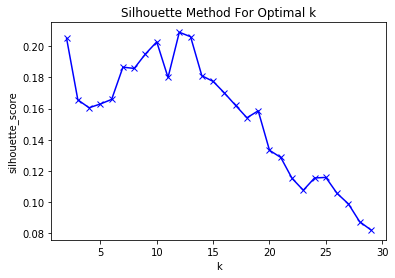

In [43]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

there is a peak when k = 10, we pick k = 10

In [44]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(food_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 5, 3, 3, 7, 8, 1, 4, 9, 1, 5, 7, 0, 6, 3, 3, 1, 9, 9, 1, 9, 3,
       0, 3, 1, 5, 3, 2, 2, 0, 1, 5, 0])

In [45]:
# add clustering labels
try:
    food_venues_sorted.drop('Cluster Labels', axis=1)
except:
    food_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

food_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Battery Park City,Coffee Shop,Burger Joint,Deli / Bodega,Fast Food Restaurant,Donut Shop,Food Court,Mexican Restaurant,Sandwich Place,Mediterranean Restaurant,American Restaurant
1,5,Chelsea,Coffee Shop,Bakery,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,BBQ Joint,Wine Bar,Café,Pizza Place,Grocery Store
2,3,Chinatown,Chinese Restaurant,Bakery,Bubble Tea Shop,Italian Restaurant,Pizza Place,Malay Restaurant,Sandwich Place,Coffee Shop,Food Court,Sushi Restaurant
3,3,Civic Center,Chinese Restaurant,Coffee Shop,Bakery,Food Court,Grocery Store,Salad Place,Sandwich Place,Mexican Restaurant,Bubble Tea Shop,Taco Place
4,7,Clinton,Coffee Shop,Donut Shop,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Bubble Tea Shop,Food Court,Burger Joint,Taco Place,Restaurant


In [46]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
food_merged = food_venues_sorted.join(mnd.set_index('Neighborhood'), on='Neighborhood')
food_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude,Distance to NYU(km)
0,4,Battery Park City,Coffee Shop,Burger Joint,Deli / Bodega,Fast Food Restaurant,Donut Shop,Food Court,Mexican Restaurant,Sandwich Place,Mediterranean Restaurant,American Restaurant,Manhattan,40.711932,-74.016869,2.132215
1,5,Chelsea,Coffee Shop,Bakery,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,BBQ Joint,Wine Bar,Café,Pizza Place,Grocery Store,Manhattan,40.744035,-74.003116,1.661671
2,3,Chinatown,Chinese Restaurant,Bakery,Bubble Tea Shop,Italian Restaurant,Pizza Place,Malay Restaurant,Sandwich Place,Coffee Shop,Food Court,Sushi Restaurant,Manhattan,40.715618,-73.994279,1.810183
3,3,Civic Center,Chinese Restaurant,Coffee Shop,Bakery,Food Court,Grocery Store,Salad Place,Sandwich Place,Mexican Restaurant,Bubble Tea Shop,Taco Place,Manhattan,40.715229,-74.005415,1.560254
4,7,Clinton,Coffee Shop,Donut Shop,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Bubble Tea Shop,Food Court,Burger Joint,Taco Place,Restaurant,Manhattan,40.759101,-73.996119,3.422009


## 10. Visualization of Clustering 

In [47]:
# create map
latitude_NU  = 40.72925325
longitude_NU = -74.0060152
map_clusters = folium.Map(location=[latitude_NU, longitude_NU], zoom_start=13)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(food_merged['Latitude'], food_merged['Longitude'],food_merged['Neighborhood'], food_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# add a red circle marker to represent the NewYork University


folium.features.CircleMarker(
    [40.72925325,-74.0060152],
    radius=10,
    color='red',
    popup='New York University',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
).add_to(map_clusters)
       
map_clusters

## 11. Clustering Results

#### Cluster 0

In [48]:
food_merged.loc[food_merged['Cluster Labels'] == 0, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
12,Lenox Hill,Coffee Shop,Salad Place,Bar,Bakery,Burger Joint,Diner,Deli / Bodega,Bagel Shop,Italian Restaurant,Ice Cream Shop,5.869431
22,Roosevelt Island,Coffee Shop,Pizza Place,Deli / Bodega,Diner,Thai Restaurant,Ice Cream Shop,Burger Joint,Café,Mexican Restaurant,Pub,6.026848
29,Upper East Side,Coffee Shop,Burger Joint,Bakery,Salad Place,Bar,Diner,Gourmet Shop,Bagel Shop,Café,Ice Cream Shop,6.426290
32,Yorkville,Coffee Shop,Bagel Shop,Bakery,Deli / Bodega,Bar,Burger Joint,Diner,Ice Cream Shop,Café,Salad Place,7.179927


#### Cluster 1

In [49]:
food_merged.loc[food_merged['Cluster Labels'] == 1, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
6,East Village,Coffee Shop,Bakery,Pizza Place,Deli / Bodega,Bagel Shop,Fried Chicken Joint,Sushi Restaurant,American Restaurant,Sandwich Place,Café,2.010664
9,Gramercy,Coffee Shop,Bagel Shop,American Restaurant,Deli / Bodega,Café,Bakery,Fast Food Restaurant,Ice Cream Shop,Donut Shop,Japanese Restaurant,2.256726
16,Manhattan Valley,Coffee Shop,Deli / Bodega,Pizza Place,Sandwich Place,Bagel Shop,Bakery,Bar,Convenience Store,Chinese Restaurant,Café,8.343522
19,Morningside Heights,Coffee Shop,Pizza Place,Bakery,Sandwich Place,Café,Bar,Deli / Bodega,Bagel Shop,American Restaurant,Chinese Restaurant,9.447347
24,Stuyvesant Town,Coffee Shop,Bagel Shop,Pizza Place,Bakery,Dessert Shop,Café,Cocktail Bar,Deli / Bodega,Mexican Restaurant,American Restaurant,2.700317
30,Upper West Side,Coffee Shop,Bagel Shop,Bakery,Pizza Place,Café,Juice Bar,Sandwich Place,Mediterranean Restaurant,Burger Joint,Convenience Store,6.937157


#### Cluster 2

In [50]:
food_merged.loc[food_merged['Cluster Labels'] == 2, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
27,Tudor City,Coffee Shop,Donut Shop,Deli / Bodega,American Restaurant,Café,Pizza Place,Bagel Shop,Mexican Restaurant,Fast Food Restaurant,Latin American Restaurant,3.528805
28,Turtle Bay,Coffee Shop,Café,Deli / Bodega,Bagel Shop,Fast Food Restaurant,Indian Restaurant,Thai Restaurant,Donut Shop,Pizza Place,Juice Bar,4.103291


#### Cluster 3

In [51]:
food_merged.loc[food_merged['Cluster Labels'] == 3, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
2,Chinatown,Chinese Restaurant,Bakery,Bubble Tea Shop,Italian Restaurant,Pizza Place,Malay Restaurant,Sandwich Place,Coffee Shop,Food Court,Sushi Restaurant,1.810183
3,Civic Center,Chinese Restaurant,Coffee Shop,Bakery,Food Court,Grocery Store,Salad Place,Sandwich Place,Mexican Restaurant,Bubble Tea Shop,Taco Place,1.560254
14,Little Italy,Bakery,Coffee Shop,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Bubble Tea Shop,Sandwich Place,Fast Food Restaurant,Pizza Place,Italian Restaurant,1.325842
15,Lower East Side,Coffee Shop,Bakery,Pizza Place,Chinese Restaurant,Sushi Restaurant,Sandwich Place,Food Court,Bubble Tea Shop,Bagel Shop,Cocktail Bar,2.470414
21,Noho,Bakery,Coffee Shop,Pizza Place,Sandwich Place,Fried Chicken Joint,Sushi Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Hot Dog Joint,1.624577
23,Soho,Italian Restaurant,Coffee Shop,Sandwich Place,Bakery,Chinese Restaurant,Sushi Restaurant,Ice Cream Shop,Pizza Place,Salad Place,Bubble Tea Shop,0.906546
26,Tribeca,Coffee Shop,Sandwich Place,Burger Joint,Pizza Place,Bakery,Salad Place,Mexican Restaurant,Bubble Tea Shop,Italian Restaurant,French Restaurant,0.945405


#### Cluster 4

In [52]:
food_merged.loc[food_merged['Cluster Labels'] == 4, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
0,Battery Park City,Coffee Shop,Burger Joint,Deli / Bodega,Fast Food Restaurant,Donut Shop,Food Court,Mexican Restaurant,Sandwich Place,Mediterranean Restaurant,American Restaurant,2.132215
7,Financial District,Coffee Shop,Food Court,Fast Food Restaurant,Sandwich Place,Donut Shop,Burger Joint,Deli / Bodega,Mexican Restaurant,Taco Place,Restaurant,2.493530


#### Cluster 5

In [53]:
food_merged.loc[food_merged['Cluster Labels'] == 5, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
1,Chelsea,Coffee Shop,Bakery,Fast Food Restaurant,Bagel Shop,Mexican Restaurant,BBQ Joint,Wine Bar,Café,Pizza Place,Grocery Store,1.661671
10,Greenwich Village,Coffee Shop,Bakery,Pizza Place,Italian Restaurant,Sandwich Place,Donut Shop,Bagel Shop,Sushi Restaurant,Japanese Restaurant,New American Restaurant,0.575227
25,Sutton Place,Coffee Shop,Bagel Shop,Italian Restaurant,Café,Diner,American Restaurant,Deli / Bodega,Thai Restaurant,Health Food Store,Pizza Place,4.969632
31,West Village,Coffee Shop,Bakery,Italian Restaurant,Donut Shop,Bagel Shop,Sandwich Place,Pizza Place,Deli / Bodega,Fast Food Restaurant,Grocery Store,0.576233


#### Cluster 6

In [54]:
food_merged.loc[food_merged['Cluster Labels'] == 6, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
13,Lincoln Square,Bakery,Mexican Restaurant,Coffee Shop,Juice Bar,Fast Food Restaurant,Bagel Shop,Taco Place,Restaurant,American Restaurant,Pizza Place,5.222255


#### Cluster 7

In [55]:
food_merged.loc[food_merged['Cluster Labels'] == 7, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
4,Clinton,Coffee Shop,Donut Shop,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Bubble Tea Shop,Food Court,Burger Joint,Taco Place,Restaurant,3.422009
11,Hudson Yards,Coffee Shop,Café,Donut Shop,Mexican Restaurant,Pizza Place,Burger Joint,Fast Food Restaurant,Deli / Bodega,Food Court,American Restaurant,3.087602


#### Cluster 8

In [56]:
food_merged.loc[food_merged['Cluster Labels'] == 8, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
5,East Harlem,Deli / Bodega,Fast Food Restaurant,Café,Coffee Shop,American Restaurant,Donut Shop,African Restaurant,Bagel Shop,Italian Restaurant,Sandwich Place,8.728647


#### Cluster 9

In [57]:
food_merged.loc[food_merged['Cluster Labels'] == 9, food_merged.columns[[1]+ list(range(2, 12))+ [15]]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Distance to NYU(km)
8,Flatiron,Coffee Shop,Donut Shop,Fast Food Restaurant,Bagel Shop,Fried Chicken Joint,Grocery Store,Deli / Bodega,Ice Cream Shop,Café,Burger Joint,1.718804
17,Midtown,Coffee Shop,Fast Food Restaurant,Donut Shop,Bubble Tea Shop,Deli / Bodega,Bagel Shop,Mexican Restaurant,Korean Restaurant,Taco Place,Asian Restaurant,3.493974
18,Midtown South,Coffee Shop,Donut Shop,Fast Food Restaurant,Bubble Tea Shop,Fried Chicken Joint,Bagel Shop,Burger Joint,Deli / Bodega,Korean Restaurant,American Restaurant,2.590321
20,Murray Hill,Coffee Shop,Donut Shop,Bubble Tea Shop,American Restaurant,Deli / Bodega,Fast Food Restaurant,Asian Restaurant,Korean Restaurant,Bagel Shop,Fried Chicken Joint,3.150683


## 12. See the crime Results to choose a place to live


For me, I like chinese restaurant, sushi restaurant, Italian restaurant, coffee shop and Pizza place, so I choose to live in the neighborhoods in Cluster 3. Then, I want to see the safty situation in the area to choose a final neighborhood.

In [167]:
crim_manh_data=pd.read_csv('crim_manh_data.csv')
crim_manh_data.head()

,Unnamed: 0,boro_name,ntaname,ntacode,Latitude,Longitude,OFNS_DESC
0,0,Manhattan,Soho,MN24,40.720255,-74.007090,RAPE
1,1,Manhattan,Soho,MN24,40.720442,-74.006744,THEFT-FRAUD
2,2,Manhattan,Soho,MN24,40.717332,-73.998952,ASSAULT 3 & RELATED OFFENSES
3,3,Manhattan,Soho,MN24,40.722335,-74.011777,ASSAULT 3 & RELATED OFFENSES
4,4,Manhattan,Soho,MN24,40.724411,-73.995885,GRAND LARCENY


In [168]:
crim_manh_data.rename(columns={'ntaname':'Neighborhood','boro_name':'Borough','ntacode':'Neighborhoodcode','OFNS_DESC':'Describe'},inplace=True)
crim_manh_data.drop(['Unnamed: 0'],axis=1,inplace=True)
crim_manh_data.head()

,Borough,Neighborhood,Neighborhoodcode,Latitude,Longitude,Describe
0,Manhattan,Soho,MN24,40.720255,-74.007090,RAPE
1,Manhattan,Soho,MN24,40.720442,-74.006744,THEFT-FRAUD
2,Manhattan,Soho,MN24,40.717332,-73.998952,ASSAULT 3 & RELATED OFFENSES
3,Manhattan,Soho,MN24,40.722335,-74.011777,ASSAULT 3 & RELATED OFFENSES
4,Manhattan,Soho,MN24,40.724411,-73.995885,GRAND LARCENY


In [169]:
crim_tot_data=crim_manh_data.groupby(['Neighborhood'], as_index=False).agg(['mean','count'])
crim_tot_data.reset_index(drop=False, inplace=True)
crim_tot_data

Neighborhood   Latitude         Longitude       
                                      mean  count       mean  count
0             Battery Park City  40.708067   3386 -74.010176   3386
1                Central Harlem  40.812100  11666 -73.945226  11666
2                     Chinatown  40.717211   3697 -73.992731   3697
3                       Clinton  40.761623   5306 -73.990241   5306
4                   East Harlem  40.796745  11789 -73.940868  11789
5                  East Village  40.727226   2643 -73.985959   2643
6                      Gramercy  40.736526   2365 -73.983767   2365
7              Hamilton Heights  40.826026   3379 -73.947521   3379
8                  Hudson Yards  40.743988   8990 -73.996093   8990
9                    Lenox Hill  40.766140   1883 -73.957565   1883
10               Lincoln Square  40.774318   3117 -73.983275   3117
11              Lower East Side  40.718234   4572 -73.981860   4572
12               Manhattanville  40.817060   2176 -73.954483   2176
13                  Marble Hill  40.867986   3244 -73.917868   3244
14        Midtown-Midtown South  40.754522  11742 -73.984904  11742
15          Morningside Heights  40.807648   2752 -73.960606   2752
16                  Murray Hill  40.743632   2759 -73.977666   2759
17                         Soho  40.719880   5501 -74.002647   5501
18              Stuyvesant Town  40.732694    181 -73.976938    181
19                   Turtle Bay  40.755019   3093 -73.970609   3093
20              Upper East Side  40.772455   3800 -73.960921   3800
21              Upper West Side  40.791169   5574 -73.971989   5574
22           Washington Heights  40.846238   7312 -73.936478   7312
23                 West Village  40.732669   5351 -74.000336   5351
24                    Yorkville  40.777366   2247 -73.949593   2247
25  park-cemetery-etc-Manhattan  40.783886   1403 -73.950454   1403

In [170]:
crim_tot_data_col=['Neighborhood','Latitude','Lc','Longitude','Total']
crim_tot_data.columns=crim_manh_data_col
crim_tot_data.drop(['Lc'],axis=1,inplace=True)
crim_tot_data

,Neighborhood,Latitude,Longitude,Total
0,Battery Park City,40.708067,-74.010176,3386
1,Central Harlem,40.812100,-73.945226,11666
2,Chinatown,40.717211,-73.992731,3697
3,Clinton,40.761623,-73.990241,5306
4,East Harlem,40.796745,-73.940868,11789
5,East Village,40.727226,-73.985959,2643
6,Gramercy,40.736526,-73.983767,2365
7,Hamilton Heights,40.826026,-73.947521,3379
8,Hudson Yards,40.743988,-73.996093,8990
9,Lenox Hill,40.766140,-73.957565,1883


In [171]:
crim_want=crim_tot_data.loc[crim_tot_data['Neighborhood'].isin(['Chinatown','Soho','Lower East Side'])]
crim_want.replace('Soho','SoHo-TriBeCa-Civic Center-Little Italy',inplace=True) 

crim_want.sort_values(by='Total', ascending=False, inplace=True)
crim_want.set_index('Neighborhood', inplace=True)
cm_top3 = crim_want['Total']
cm_top3

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Neighborhood
SoHo-TriBeCa-Civic Center-Little Italy    5501
Lower East Side                           4572
Chinatown                                 3697
Name: Total, dtype: int64

Show the result in Horizontal Bar Plot

In [172]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


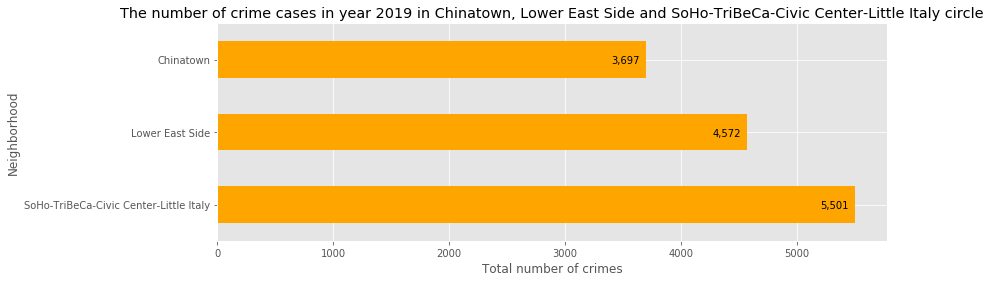

In [173]:
cm_top3.plot(kind='barh', figsize=(12,4), color='orange')
plt.xlabel('Total number of crimes')
plt.title('The number of crime cases in year 2019 in Chinatown, Lower East Side and SoHo-TriBeCa-Civic Center-Little Italy circle')

for index, value in enumerate(cm_top3): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 300, index - 0.05), color='black')
    
plt.show()

I want to live in Chinatown and now I want to see the types of crime in Chinatown

In [195]:
crim_chi_data=crim_manh_data[crim_manh_data['Neighborhood']=='Chinatown'].reset_index(drop=True)
crim_chi_data.shape

(3697, 6)

In [196]:
crim_chi_data.head()

,Borough,Neighborhood,Neighborhoodcode,Latitude,Longitude,Describe
0,Manhattan,Chinatown,MN27,40.713454,-73.997711,MURDER & NON-NEGL. MANSLAUGHTER
1,Manhattan,Chinatown,MN27,40.721257,-73.992238,GRAND LARCENY
2,Manhattan,Chinatown,MN27,40.719981,-73.992898,GRAND LARCENY
3,Manhattan,Chinatown,MN27,40.716196,-73.997491,SEX CRIMES
4,Manhattan,Chinatown,MN27,40.721622,-73.989034,ROBBERY


In [197]:
crim_chi_data['Describe'].value_counts()

PETIT LARCENY                      695
ASSAULT 3 & RELATED OFFENSES       629
GRAND LARCENY                      532
HARRASSMENT 2                      473
CRIMINAL MISCHIEF & RELATED OF     329
FELONY ASSAULT                     161
OFF. AGNST PUB ORD SENSBLTY &      118
ROBBERY                            106
SEX CRIMES                          98
DANGEROUS DRUGS                     83
BURGLARY                            67
VEHICLE AND TRAFFIC LAWS            53
OFFENSES AGAINST PUBLIC ADMINI      47
MISCELLANEOUS PENAL LAW             41
CRIMINAL TRESPASS                   39
OTHER OFFENSES RELATED TO THEF      27
FORGERY                             23
DANGEROUS WEAPONS                   20
THEFT-FRAUD                         20
OFFENSES INVOLVING FRAUD            19
POSSESSION OF STOLEN PROPERTY       19
FRAUDS                              16
INTOXICATED & IMPAIRED DRIVING      15
OFFENSES AGAINST THE PERSON         12
RAPE                                12
GRAND LARCENY OF MOTOR VE

In [198]:
crim_chi_data=crim_chi_data.groupby(['Describe'], as_index=False).agg('count')

crim_chi_data

,Describe,Borough,Neighborhood,Neighborhoodcode,Latitude,Longitude
0,ADMINISTRATIVE CODE,2,2,2,2,2
1,ARSON,7,7,7,7,7
2,ASSAULT 3 & RELATED OFFENSES,629,629,629,629,629
3,BURGLARY,67,67,67,67,67
4,CRIMINAL MISCHIEF & RELATED OF,329,329,329,329,329
5,CRIMINAL TRESPASS,39,39,39,39,39
6,DANGEROUS DRUGS,83,83,83,83,83
7,DANGEROUS WEAPONS,20,20,20,20,20
8,FELONY ASSAULT,161,161,161,161,161
9,FORGERY,23,23,23,23,23


In [199]:
crim_chi_data.drop(['Neighborhood','Neighborhoodcode','Latitude','Longitude'], axis=1, inplace=True)

crim_chi_data

,Describe,Borough
0,ADMINISTRATIVE CODE,2
1,ARSON,7
2,ASSAULT 3 & RELATED OFFENSES,629
3,BURGLARY,67
4,CRIMINAL MISCHIEF & RELATED OF,329
5,CRIMINAL TRESPASS,39
6,DANGEROUS DRUGS,83
7,DANGEROUS WEAPONS,20
8,FELONY ASSAULT,161
9,FORGERY,23


In [202]:
crim_chi_data_col=['Describe','Number']
crim_chi_data.columns=crim_chi_data_col
crim_chi_data=crim_chi_data.sort_values(by='Number', ascending=False)
crim_chi_data.head(9)

,Describe,Number
28,PETIT LARCENY,695
2,ASSAULT 3 & RELATED OFFENSES,629
12,GRAND LARCENY,532
14,HARRASSMENT 2,473
4,CRIMINAL MISCHIEF & RELATED OF,329
8,FELONY ASSAULT,161
22,OFF. AGNST PUB ORD SENSBLTY &,118
32,ROBBERY,106
33,SEX CRIMES,98


In [203]:
crim_chi_data.reset_index(drop=True,inplace=True)
crim_chi_data

,Describe,Number
0,PETIT LARCENY,695
1,ASSAULT 3 & RELATED OFFENSES,629
2,GRAND LARCENY,532
3,HARRASSMENT 2,473
4,CRIMINAL MISCHIEF & RELATED OF,329
5,FELONY ASSAULT,161
6,OFF. AGNST PUB ORD SENSBLTY &,118
7,ROBBERY,106
8,SEX CRIMES,98
9,DANGEROUS DRUGS,83


In [215]:
crim_chi=crim_chi_data.head(12)
other_count=crim_chi_data.iloc[12:37,1].sum()
crim_chi.loc[12]={'Describe':'Other','Number':other_count}
crim_chi

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Describe,Number
0,PETIT LARCENY,695
1,ASSAULT 3 & RELATED OFFENSES,629
2,GRAND LARCENY,532
3,HARRASSMENT 2,473
4,CRIMINAL MISCHIEF & RELATED OF,329
5,FELONY ASSAULT,161
6,OFF. AGNST PUB ORD SENSBLTY &,118
7,ROBBERY,106
8,SEX CRIMES,98
9,DANGEROUS DRUGS,83


In [218]:
crim_chi['Describe'] = crim_chi['Describe'].astype('string')
crim_chi['Describe'] = crim_chi['Describe'].str.title( )
crim_chi.replace({'Assault 3 & Related Offenses':'Assault & Related Offenses','Off. Agnst Pub Ord Sensblty &':'Off. Agnst Pub Ord Sensblty','Harrassment 2':'Harrassment'},inplace=True)
crim_chi

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,Describe,Number
0,Petit Larceny,695
1,Assault & Related Offenses,629
2,Grand Larceny,532
3,Harrassment,473
4,Criminal Mischief & Related Of,329
5,Felony Assault,161
6,Off. Agnst Pub Ord Sensblty,118
7,Robbery,106
8,Sex Crimes,98
9,Dangerous Drugs,83


In [219]:
crim_chi.set_index('Describe', inplace=True)
crim_chi

,Number
Describe,
Petit Larceny,695
Assault & Related Offenses,629
Grand Larceny,532
Harrassment,473
Criminal Mischief & Related Of,329
Felony Assault,161
Off. Agnst Pub Ord Sensblty,118
Robbery,106
Sex Crimes,98


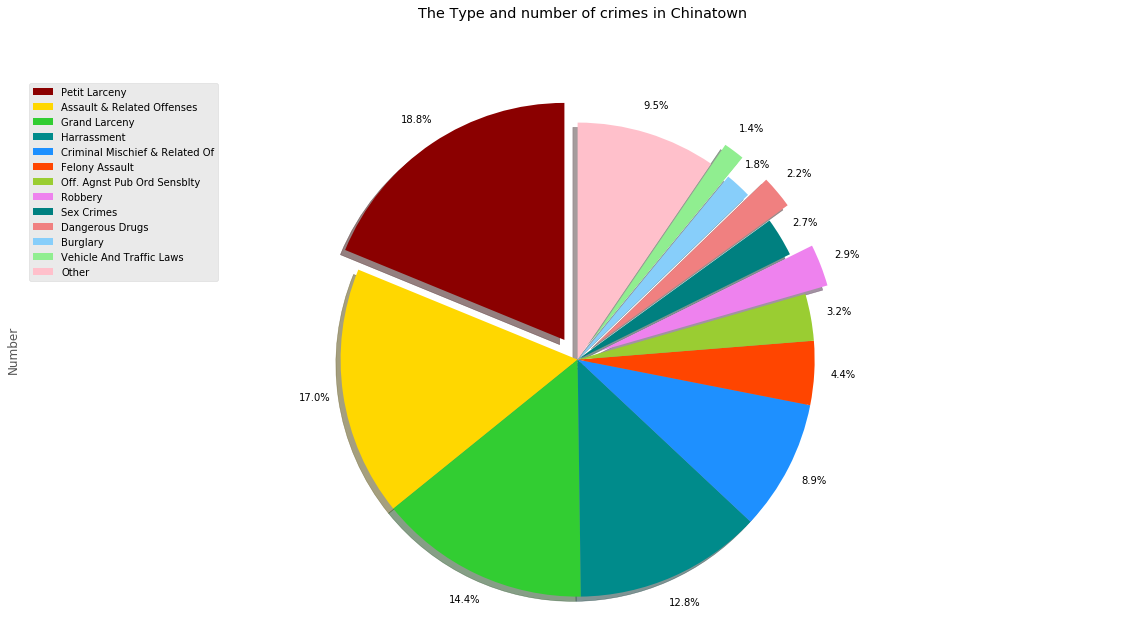

In [224]:
colors_list = ['darkred','gold','limegreen','darkcyan','dodgerblue','orangered', 'yellowgreen','violet','teal','lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0, 0.1, 0, 0.1, 0] # ratio for each continent with which to offset each wedge.

crim_chi['Number'].plot(kind='pie',  
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('The Type and number of crimes in Chinatown', y=1.1) 

plt.axis('equal') 

# add legend
plt.legend(labels=crim_chi.index, loc='upper left') 

plt.show()